In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense , GlobalMaxPooling2D
from tensorflow.keras.applications.vgg16  import VGG16, preprocess_input

import numpy as np
from tqdm import tqdm
import pickle


In [3]:
model = VGG16(weights = "imagenet", include_top = False, input_shape = (244,244,3))
model.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [4]:
from tensorflow.keras import Sequential
model = Sequential([model, GlobalMaxPooling2D()])

In [5]:
#model.summary()

In [6]:
import cv2
import matplotlib.pyplot as plt


In [9]:
path = "/content/drive/MyDrive/DATASET/image1.jpeg"
img = cv2.imread(path)

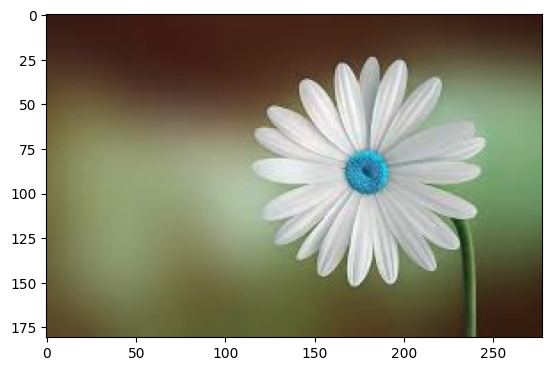

In [10]:
plt.imshow(img)

In [11]:
img.shape

(181, 278, 3)

In [12]:
img_arr = np.expand_dims(cv2.resize(img, (244,244)), axis = 0)

In [13]:
img_arr

array([[[[55, 26, 19],
         [55, 26, 19],
         [55, 26, 19],
         ...,
         [51, 22, 17],
         [51, 22, 17],
         [51, 22, 17]],

        [[55, 26, 19],
         [55, 26, 19],
         [55, 26, 19],
         ...,
         [51, 23, 18],
         [51, 23, 18],
         [51, 23, 18]],

        [[55, 26, 19],
         [55, 26, 19],
         [55, 26, 19],
         ...,
         [52, 23, 18],
         [52, 23, 18],
         [52, 23, 18]],

        ...,

        [[88, 70, 39],
         [88, 70, 39],
         [88, 70, 39],
         ...,
         [54, 27, 17],
         [54, 27, 17],
         [54, 27, 17]],

        [[88, 70, 39],
         [88, 70, 39],
         [88, 70, 39],
         ...,
         [54, 27, 17],
         [54, 27, 17],
         [54, 27, 17]],

        [[88, 70, 39],
         [88, 70, 39],
         [88, 70, 39],
         ...,
         [54, 27, 17],
         [54, 27, 17],
         [54, 27, 17]]]], dtype=uint8)

In [14]:
process_image = preprocess_input(img_arr)

In [15]:
imgout = model.predict(process_image)

1/1 [==============================] - 1s 865ms/step


In [16]:
path = "//content/drive/MyDrive/DATASET/images.jpeg"
img1 = cv2.imread(path)

In [17]:
img1_arr = np.expand_dims(cv2.resize(img1, (244,244)), axis = 0)

In [18]:
process_image1 = preprocess_input(img1_arr)
img1out = model.predict(process_image1)

1/1 [==============================] - 1s 655ms/step


In [19]:
def cosine_similarity(v1,v2):
  return v1@v2.T/(np.linalg.norm(v1)*np.linalg.norm(v2))

In [20]:
cosine_similarity(imgout,img1out)

array([[0.7583562]], dtype=float32)

In [21]:
def extract_features(img_path, model):
    img = cv2.imread(img_path)
    img_arr = np.expand_dims(cv2.resize(img, (244,244)), axis = 0)
    process_image = preprocess_input(img_arr)
    result = model.predict(process_image)
    normalize = result/np.linalg.norm(result)
    return normalize

In [23]:
path = "/content/drive/MyDrive/DATASET/image1.jpeg"
extract_features(path, model)

1/1 [==============================] - 1s 814ms/step


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.88561564e-03, 0.00000000e+00, 2.37854518e-04, 1.89521946e-02,
        2.04455876e-03, 2.25553010e-02, 2.46283561e-02, 0.00000000e+00,
        7.53337867e-04, 0.00000000e+00, 0.00000000e+00, 1.12890042e-02,
        0.00000000e+00, 2.83479169e-02, 3.58979963e-02, 0.00000000e+00,
        0.00000000e+00, 1.93705596e-02, 0.00000000e+00, 6.56635985e-02,
        2.51270421e-02, 5.77913523e-02, 0.00000000e+00, 0.00000000e+00,
        4.25769985e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.63168472e-03, 0.00000000e+00, 0.00000000e+00, 3.04079223e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.34497357e-02, 0.00000000e+00, 1.05448607e-02, 1.80684272e-02,
        3.61902937e-02, 7.77786481e-04, 1.37437293e-02, 0.00000000e+00,
        0.00000000e+00, 5.04354073e-04, 3.22105996e-02, 2.25453824e-02,
        0.00000000e+00, 1.08251661e-01, 0.00000000e+00, 7.893958

In [24]:
path = "/content/drive/MyDrive/DATASET/images.jpeg"
extract_features(path, model)

1/1 [==============================] - 1s 1s/step


array([[0.00000000e+00, 0.00000000e+00, 5.68763912e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.08221751e-02, 0.00000000e+00,
        0.00000000e+00, 2.52233800e-02, 3.50889452e-02, 0.00000000e+00,
        1.63735617e-02, 0.00000000e+00, 0.00000000e+00, 1.21581480e-02,
        0.00000000e+00, 2.56764162e-02, 3.42053361e-02, 0.00000000e+00,
        2.73959385e-03, 0.00000000e+00, 0.00000000e+00, 1.20111115e-01,
        5.85063808e-02, 3.92953353e-03, 0.00000000e+00, 0.00000000e+00,
        1.31762652e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.31903079e-03, 2.82026324e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.80990212e-02,
        1.30395563e-02, 0.00000000e+00, 3.78824957e-03, 7.98868984e-02,
        2.38068458e-02, 2.25679809e-03, 1.53956497e-02, 4.09725420e-02,
        0.00000000e+00, 1.22794975e-02, 6.34716675e-02, 0.00000000e+00,
        5.85758453e-03, 2.03812838e-01, 1.85033423e-05, 0.000000

In [ ]:
files = []
path = "C:/Users/khann/Downloads/archive (9)/images"
for filename in os.listdir(path):
    files.append(os.path.join(path, filename))

NameError: name 'pickle' is not defined